In [1]:
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import transforms
from scipy import optimize
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSTool as LT 

In [27]:
objdct = dict()
strRoot = '/home/paul/csf3_scratch/Sigma13/Expand/'
for j in os.listdir(strRoot):
    if j.endswith('.dmp'):
        objData = LT.LAMMPSData(strRoot+ str(j),1,4.05, LT.LAMMPSGlobal)
        objHex = objData.GetTimeStepByIndex(-1)
        objdct[j] = objHex


In [28]:
lstLengths = []
lstTotalEnergy = []
for k in objdct.keys():
    lstLengths.append(np.linalg.norm(objdct[k].GetCellVectors()[0]))
    lstTotalEnergy.append(np.sum(objdct[k].GetColumnByName('c_pe1'))+3.36000002*objdct[k].GetNumberOfAtoms())

In [29]:
def LinearFit(l, a0,a1):
    return +a1*l +a0
def CubicFit(l,a2,a1, a0):
    return a2*l**2 + a1*l +a0*np.log(l)
popt, popv = optimize.curve_fit(LinearFit, lstLengths, lstTotalEnergy)
print(popt)
lstFitted = LinearFit(np.array(lstLengths), *popt)
arrC = np.polynomial.legendre.legfit(lstLengths, lstTotalEnergy,2)
np.polynomial.legendre.leg2poly(arrC)

[-1.93434564  0.70203554]


array([2.38092829e+00, 6.74715034e-01, 3.14489697e-05])

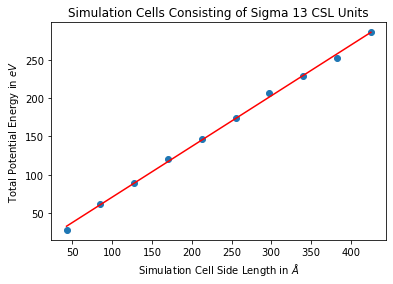

In [22]:
plt.scatter(lstLengths, lstTotalEnergy)
plt.plot(np.sort(lstLengths), np.sort(lstFitted), c='r')
plt.xlabel('Simulation Cell Side Length in $\AA$')
plt.ylabel('Total Potential Energy in $eV$')
plt.title('Simulation Cells Consisting of Sigma 13 CSL Units')
plt.show()

In [82]:
objData = LT.LAMMPSData('/home/paul/PythonLAMMPS/Hex222Sigma7.dmp',1,4.05, LT.LAMMPSGlobal)
objHex = objData.GetTimeStepByIndex(-1)
fltDatum = np.mean(objHex.GetColumnByName('c_pe1'))
print(fltDatum)

/home/paul/TripleLines.github.io/LAMMPSTool.py:235: UserWarning: Error missing atom structure types in dump file.
  warnings.warn('Error missing atom structure types in dump file.')
/home/paul/TripleLines.github.io/LAMMPSTool.py:239: UserWarning: Per atom volume data is missing.
  warnings.warn('Per atom volume data is missing.')


-3.35981559350741


In [7]:
intSigma = 7
objdct= dict()
#strDirectory = '/home/paul/csf3_scratch/Sigma' + str(intSigma) + '/'
strDirectory = '/home/paul/PythonLAMMPS/'
lstHexNames = ['122','133','233', '123','222' ]
for j in lstHexNames:
    strFile = strDirectory + 'Hex' + str(j) + 'Sigma' + str(intSigma) + '.dmp'
    objData = LT.LAMMPSData(strFile,1,4.05, LT.LAMMPSGlobal)
    objHex = objData.GetTimeStepByIndex(-1)
   # objHex.ReadInDefectData(strFile[:-3] + 'dfc')
    objdct[j] = objHex

In [ ]:
print(objdct['123'].GetColumnNames())
np.sum(objdct['233'].GetAtomsByID(objdct['233'].GetLatticeAtomIDs())[:,7]) +3.360000236*len(objdct['233'].GetLatticeAtomIDs())

In [6]:
def ExcessEnergies(objHex, lstGBs, lstTJs, lstGN, fltDatum = 3.360000023):
    fltGB = 0
    fltTJ = 0
    fltGN = 0
    for i in lstGBs:
        fltGB += objHex.GetGrainBoundary(i).GetTotalPE() + fltDatum*objHex.GetGrainBoundary(i).GetNumberOfAtoms()
    for j in lstTJs:
        fltTJ += objHex.GetJunctionLine(j).GetTotalPE() + fltDatum*objHex.GetJunctionLine(j).GetNumberOfAtoms()
    for k in lstGN:
        fltGN += np.sum(objHex.GetAtomsByID(objHex.GetGrainAtomIDs(k))[:,7]) + fltDatum*len(objHex.GetGrainAtomIDs(k))
    return [fltGB, fltTJ, fltGN]

In [ ]:
def GetTotalAtoms(objHex, intGrainNumber):
    intNumberOfAtoms = 0
    intNumberOfAtoms = len(objHex.GetGrainAtomIDs(intGrainNumber))
    for j in objHex.GetGrainBoundaryIDs():
        if intGrainNumber in objHex.GetGrainBoundary(j).GetAdjacentGrains():
            intNumberOfAtoms += objHex.GetGrainBoundary(j).GetNumberOfAtoms()
    for k in objHex.GetJunctionLineIDs():
        if intGrainNumber in objHex.GetJunctionLine(k).GetAdjacentGrains():
            intNumberOfAtoms += objHex.GetJunctionLine(k).GetNumberOfAtoms()
    return intNumberOfAtoms

In [ ]:
flt123 = np.sum(lst123)
flt122 = GetTotalAtoms(objHex123,2)*np.sum(lst122)/GetTotalAtoms(objHex122,2)
flt133 = GetTotalAtoms(objHex123,2)*np.sum(lst133)/GetTotalAtoms(objHex133,2)
flt233 = GetTotalAtoms(objHex123,2)*np.sum(lst233)/GetTotalAtoms(objHex233,2)
print(flt123-0.5*(flt122+flt133+flt233))

In [ ]:
fltTotalPE123 = np.sum(objdct['123'].GetAtomData()[:,7])
fltMinusOff = 0
for j in lstHexNames[1:]:
    fltMinusOff += 0.5*objdct['123'].GetNumberOfAtoms()*np.mean(objdct[j].GetAtomData()[:,7])
fltTotalPE123-fltMinusOff-0.5*fltDatum*objdct['123'].GetNumberOfAtoms()

In [ ]:
np.std(objdct['133'].GetAtomsByID(objdct['133'].GetLatticeAtomIDs())[:,7])

In [6]:
print(lstHexNames)
for j in lstHexNames:
    print(objdct[j].GetNumberOfAtoms())
GetExcessEnergy(objdct['123'], fltDatum)

['122', '133', '233', '123']
14205
14196
14175
14202


NameError: name 'GetExcessEnergy' is not defined

In [58]:
def GetExcessEnergy(objGlobal, fltdatum):
    fltTotalPE = np.sum(objGlobal.GetAtomData()[:,7])
    fltExcess = fltTotalPE -fltdatum*objGlobal.GetNumberOfAtoms()
    return fltExcess/objGlobal.GetNumberOfAtoms()

In [59]:
fltPerAtom =GetExcessEnergy(objdct['123'],fltDatum)-0.5*(GetExcessEnergy(objdct['122'],fltDatum)
                                             +GetExcessEnergy(objdct['133'],fltDatum)
                                             + GetExcessEnergy(objdct['233'],fltDatum))
print(fltPerAtom)

0.00042114463484994695


In [ ]:
GetExcessEnergy(objHex123,-3.36)-0.5*(GetExcessEnergy(objHex122, -3.36)+GetExcessEnergy(objHex133, -3.36)+(intAtoms123/intAtoms233)*GetExcessEnergy(objHex233, -3.36))

In [ ]:
(np.mean(objHex133.GetAtomsByID(objHex133.GetLatticeAtomIDs())[:,7])+3.36000002)*len(objHex133.GetLatticeAtomIDs())